# Convert Youtube Video into Images

In [1]:
%load_ext lab_black

In [2]:
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pylab as plt

video_name = "jtOekrlROk4"
vidcap = cv2.VideoCapture(f"../data/{video_name}.mp4")

In [3]:
vidcap.get(cv2.cv2.CAP_PROP_FPS)

30.0

In [2]:
15 * 60 * 30

27000

In [52]:
def cv2_imgshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
success, image = vidcap.read()
frame = 1
while success:
    success, image = vidcap.read()
    if frame % 15 == 0:
        cv2.imwrite(f"../data/{video_name}/{video_name}_{frame}.jpg", image)
    frame += 1

In [49]:
first_img = cv2.imread("../data/jtOekrlROk4/jtOekrlROk4_15.jpg")
game_img = cv2.imread("../data/jtOekrlROk4/jtOekrlROk4_10305.jpg")

In [53]:
game_img_noboard = game_img.copy()

In [85]:
def extract_board_and_mask(img):
    board = game_img[0:440, 430:854, :].copy()
    img[0:440, 430:850, :] = first_img[0:440, 430:850, :]
    return img, board

In [86]:
img_new, board = extract_board_and_mask(img)

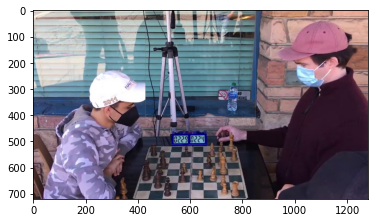

In [87]:
cv2_imgshow(img_new)

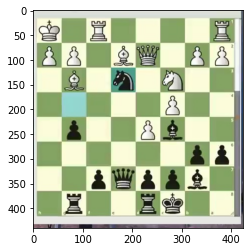

In [88]:
cv2_imgshow(board)

In [89]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (
        arr.reshape(h // nrows, nrows, -1, ncols)
        .swapaxes(1, 2)
        .reshape(-1, nrows, ncols)
    )

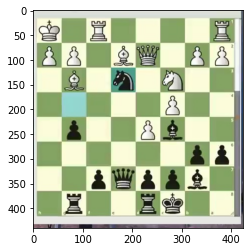

In [97]:
cv2_imgshow(board)

In [124]:
split_board = blockshaped(board[:, :, 0], board.shape[0] // 8, board.shape[1] // 8)

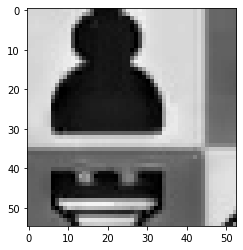

In [128]:
cv2_imgshow(split_board[52])

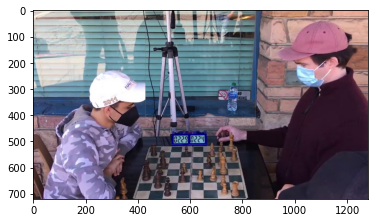

In [59]:
cv2_imgshow(game_img_noboard)

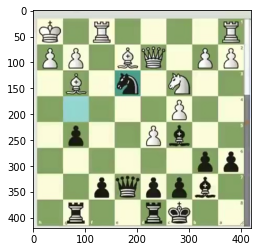

In [62]:
chess_board = game_img[0:420, 430:850, :]
cv2_imgshow(chess_board)